In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv('abalone.csv')

# Periksa kolom yang ada dalam DataFrame
print("Kolom yang ada dalam DataFrame:", df.columns)

# Menampilkan beberapa baris dari dataset
print(df.head())

Kolom yang ada dalam DataFrame: Index(['sex', 'length', 'diameter', 'height', 'whole-weight', 'shucked-weight',
       'viscera-weight', 'shell-weight', 'rings'],
      dtype='object')
  sex  length  diameter  height  whole-weight  shucked-weight  viscera-weight  \
0   M      91        73      19         102.8            44.9            20.2   
1   M      70        53      18          45.1            19.9             9.7   
2   F     106        84      27         135.4            51.3            28.3   
3   M      88        73      25         103.2            43.1            22.8   
4   I      66        51      16          41.0            17.9             7.9   

   shell-weight  rings  
0          30.0     15  
1          14.0      7  
2          42.0      9  
3          31.0     10  
4          11.0      7  


EKSPLORASI DATA

In [3]:
# Memeriksa informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   int64  
 2   diameter        4177 non-null   int64  
 3   height          4177 non-null   int64  
 4   whole-weight    4177 non-null   float64
 5   shucked-weight  4177 non-null   float64
 6   viscera-weight  4177 non-null   float64
 7   shell-weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB
None


In [4]:
# Memeriksa statistik deskriptif
print(df.describe())

            length     diameter       height  whole-weight  shucked-weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean    104.798420    81.576251    27.903280    165.748432       71.873498   
std      24.018583    19.847973     8.365411     98.077804       44.392590   
min      15.000000    11.000000     0.000000      0.400000        0.200000   
25%      90.000000    70.000000    23.000000     88.300000       37.200000   
50%     109.000000    85.000000    28.000000    159.900000       67.200000   
75%     123.000000    96.000000    33.000000    230.600000      100.400000   
max     163.000000   130.000000   226.000000    565.100000      297.600000   

       viscera-weight  shell-weight        rings  
count     4177.000000   4177.000000  4177.000000  
mean        36.118722     47.766172     9.933684  
std         21.922850     27.840534     3.224169  
min          0.100000      0.300000     1.000000  
25%         18.700000     26.000000     8.

In [5]:
# Memeriksa nilai yang hilang
print(df.isnull().sum())

sex               0
length            0
diameter          0
height            0
whole-weight      0
shucked-weight    0
viscera-weight    0
shell-weight      0
rings             0
dtype: int64


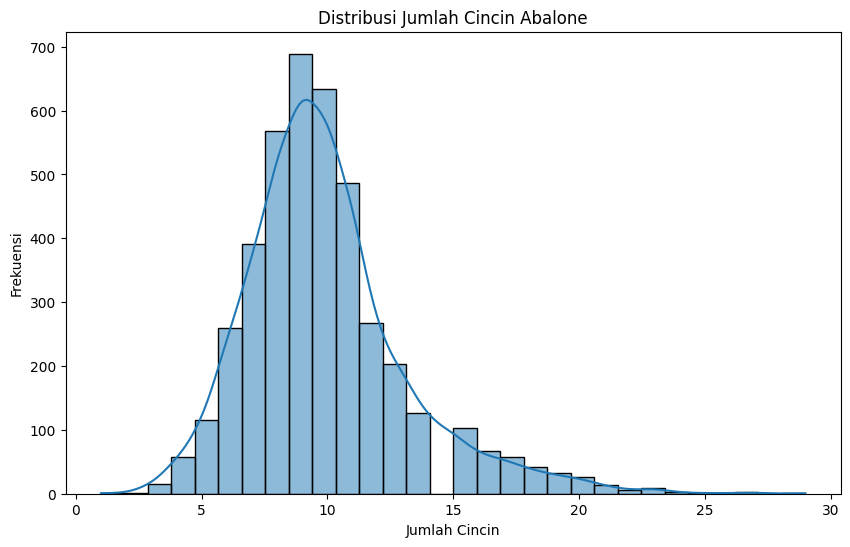

In [6]:
# Visualisasi distribusi target (Rings)
plt.figure(figsize=(10, 6))
sns.histplot(df['rings'], bins=30, kde=True)
plt.title('Distribusi Jumlah Cincin Abalone')
plt.xlabel('Jumlah Cincin')
plt.ylabel('Frekuensi')
plt.show()

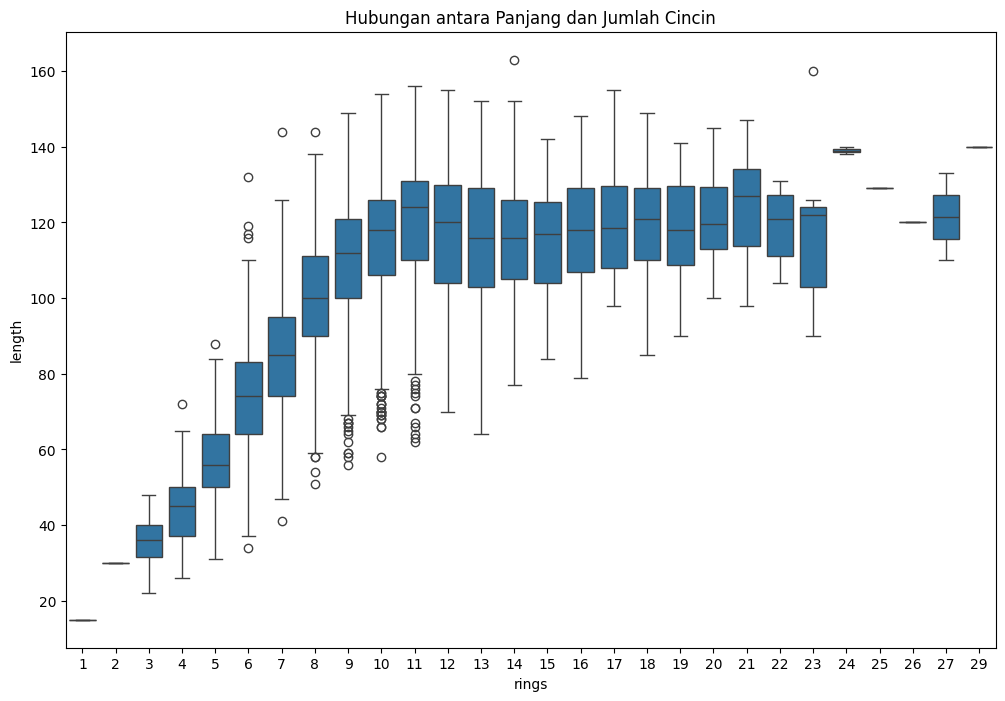

In [7]:
# Visualisasi hubungan antara fitur dan target
plt.figure(figsize=(12, 8))
sns.boxplot(x='rings', y='length', data=df)
plt.title('Hubungan antara Panjang dan Jumlah Cincin')
plt.show()

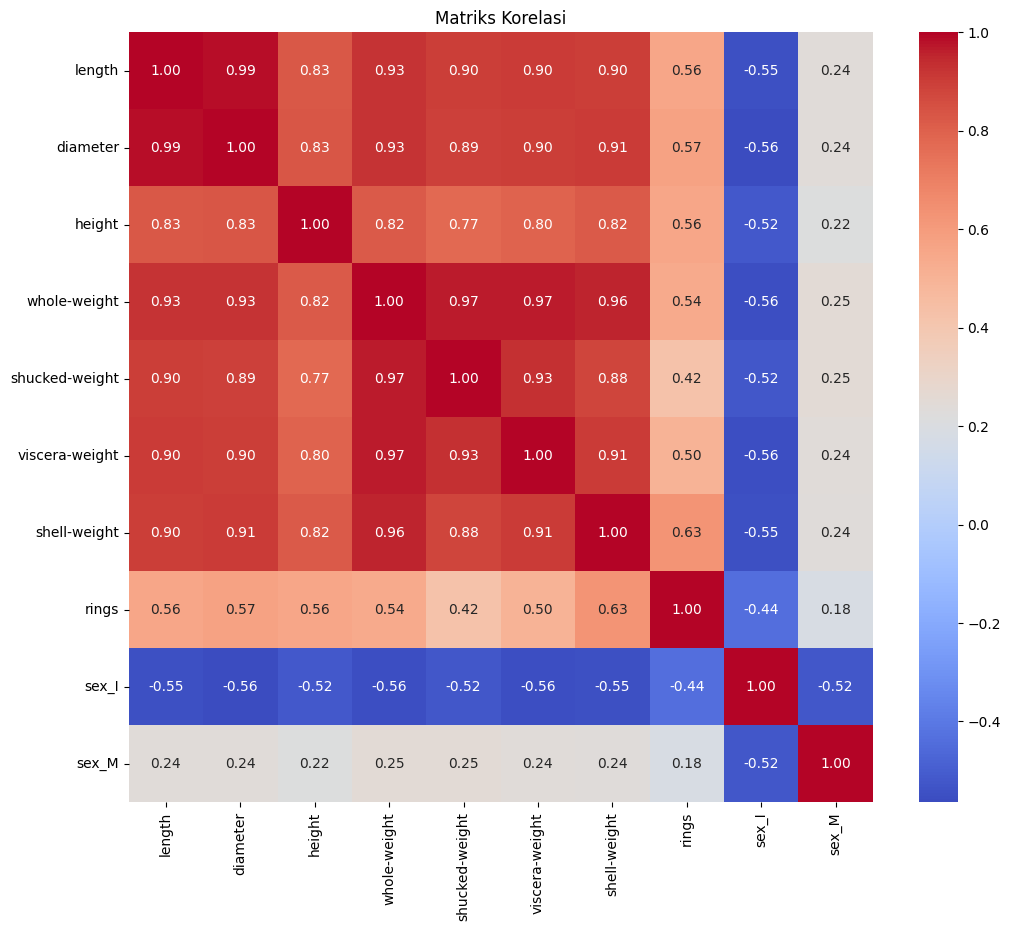

In [8]:
# Mengonversi kolom 'sex' menjadi variabel dummy
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Memeriksa korelasi antara fitur
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

In [9]:
average_height = df.groupby('height').mean()
print("Rata-rata tinggi:")
print(average_height)

Rata-rata tinggi:
            length    diameter  whole-weight  shucked-weight  viscera-weight  \
height                                                                         
0        74.500000   57.000000     56.200000       26.400000       11.450000   
2        15.000000   11.000000      0.400000        0.200000        0.100000   
3        80.000000   61.000000    117.100000       51.700000       31.100000   
4        32.500000   23.000000      3.700000        1.400000        0.700000   
5        33.000000   23.200000      4.440000        1.540000        1.080000   
6        33.333333   24.333333      4.733333        1.783333        1.166667   
7        30.666667   21.833333      4.016667        1.483333        1.033333   
8        37.230769   27.769231      7.030769        2.884615        1.561538   
9        40.545455   29.818182      8.154545        3.490909        1.981818   
10       44.166667   32.111111     10.950000        4.272222        2.572222   
11       47.920000   3

<Figure size 1200x600 with 0 Axes>

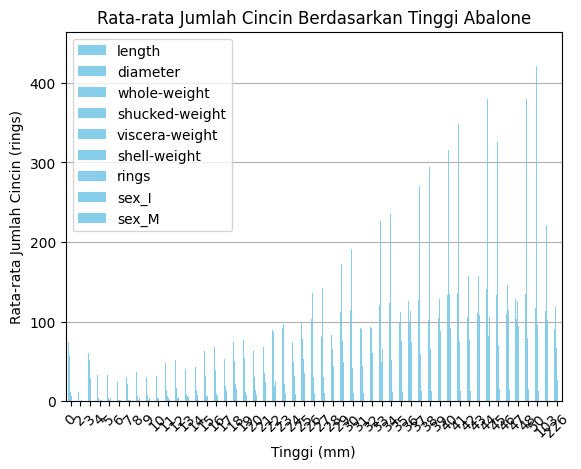

In [10]:
# Membuat visualisasi grafik batang
plt.figure(figsize=(12, 6))
average_height.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Jumlah Cincin Berdasarkan Tinggi Abalone')
plt.xlabel('Tinggi (mm)')
plt.ylabel('Rata-rata Jumlah Cincin (rings)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

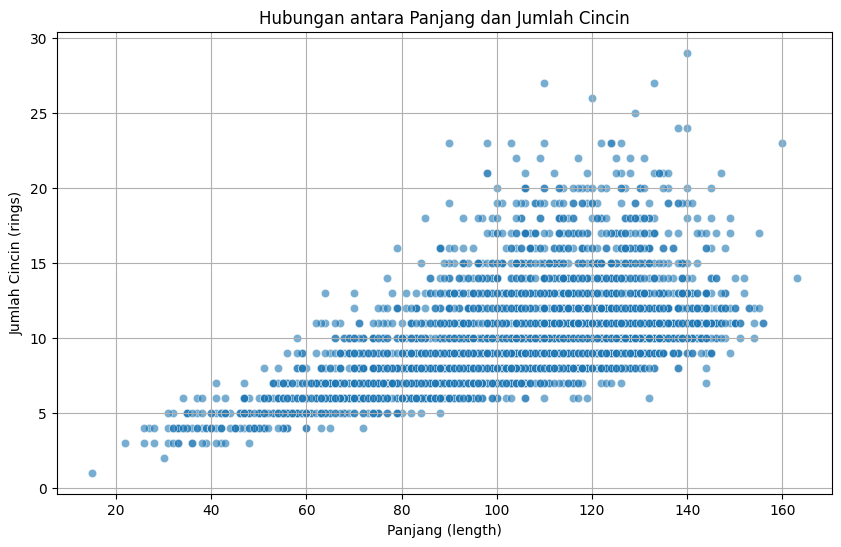

In [11]:
# Visualisasi hubungan antara panjang dan jumlah cincin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length', y='rings', data=df, alpha=0.6)
plt.title('Hubungan antara Panjang dan Jumlah Cincin')
plt.xlabel('Panjang (length)')
plt.ylabel('Jumlah Cincin (rings)')
plt.grid()
plt.show()

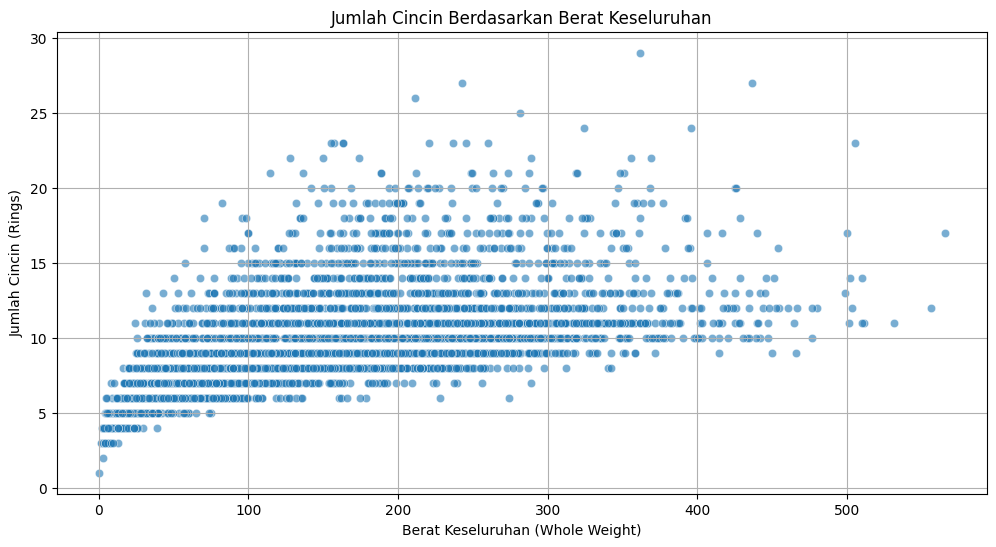

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='whole-weight', y='rings', data=df, alpha=0.6)
plt.title('Jumlah Cincin Berdasarkan Berat Keseluruhan')
plt.xlabel('Berat Keseluruhan (Whole Weight)')
plt.ylabel('Jumlah Cincin (Rings)')
plt.grid(True)
plt.show()

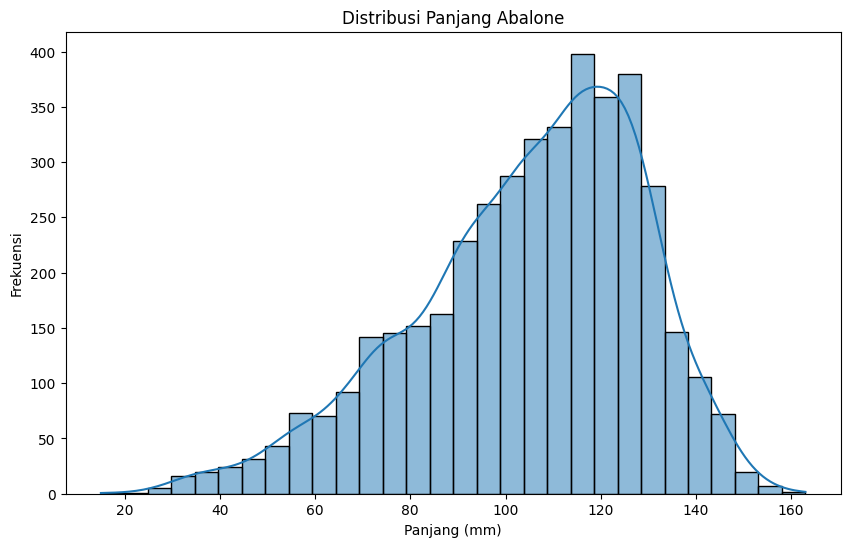

In [13]:
# Memeriksa distribusi panjang abalone
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True)
plt.title('Distribusi Panjang Abalone')
plt.xlabel('Panjang (mm)')
plt.ylabel('Frekuensi')
plt.show()

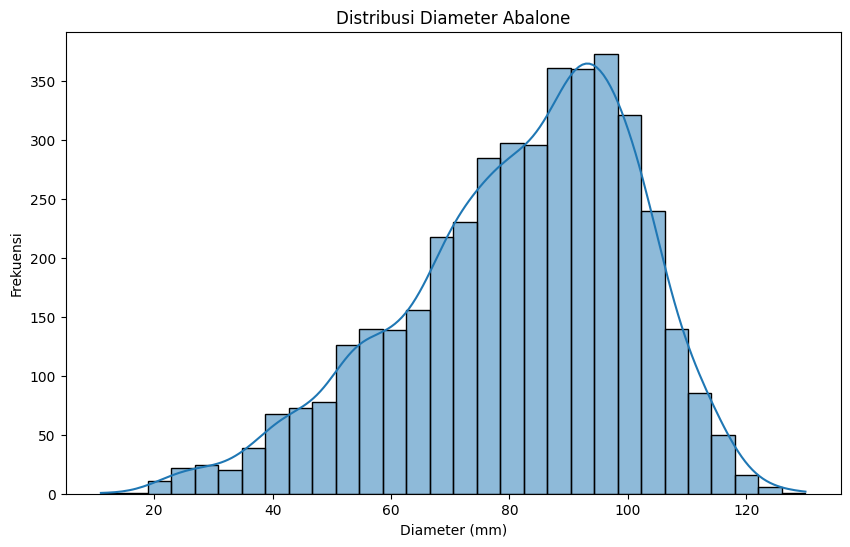

In [14]:
# Memeriksa distribusi diameter abalone
plt.figure(figsize=(10, 6))
sns.histplot(df['diameter'], bins=30, kde=True)
plt.title('Distribusi Diameter Abalone')
plt.xlabel('Diameter (mm)')
plt.ylabel('Frekuensi')
plt.show()

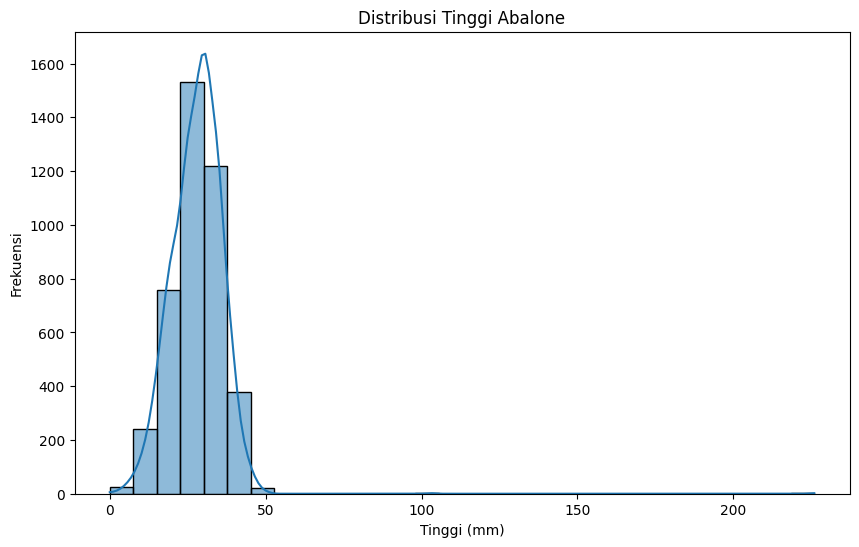

In [15]:
# Memeriksa distribusi tinggi abalone
plt.figure(figsize=(10, 6))
sns.histplot(df['height'], bins=30, kde=True)
plt.title('Distribusi Tinggi Abalone')
plt.xlabel('Tinggi (mm)')
plt.ylabel('Frekuensi')
plt.show()

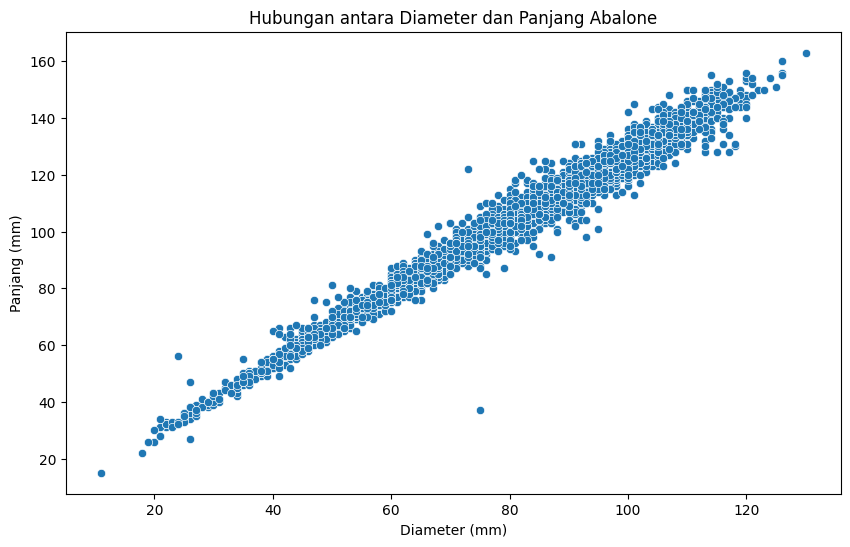

In [16]:
# Memeriksa hubungan antara diameter dan panjang
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diameter', y='length', data=df)
plt.title('Hubungan antara Diameter dan Panjang Abalone')
plt.xlabel('Diameter (mm)')
plt.ylabel('Panjang (mm)')
plt.show()

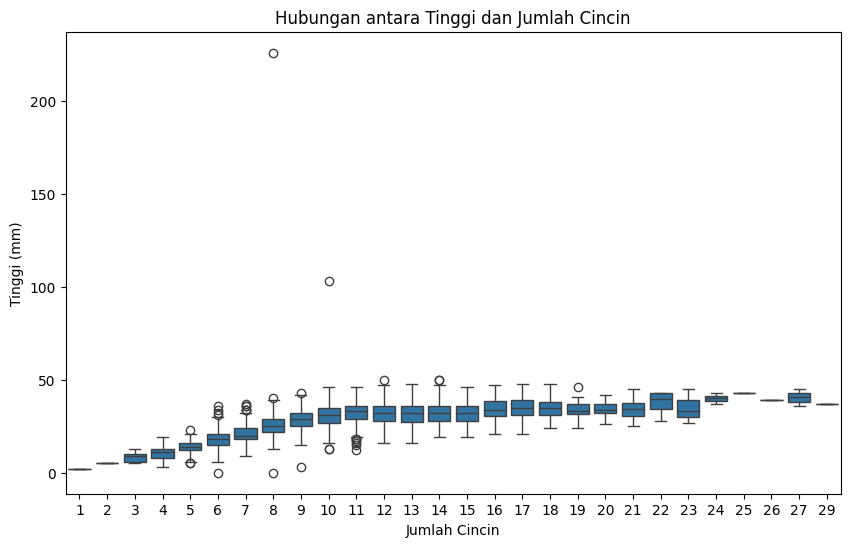

In [17]:
# Memeriksa hubungan antara tinggi dan jumlah cincin
plt.figure(figsize=(10, 6))
sns.boxplot(x='rings', y='height', data=df)
plt.title('Hubungan antara Tinggi dan Jumlah Cincin')
plt.xlabel('Jumlah Cincin')
plt.ylabel('Tinggi (mm)')
plt.show()

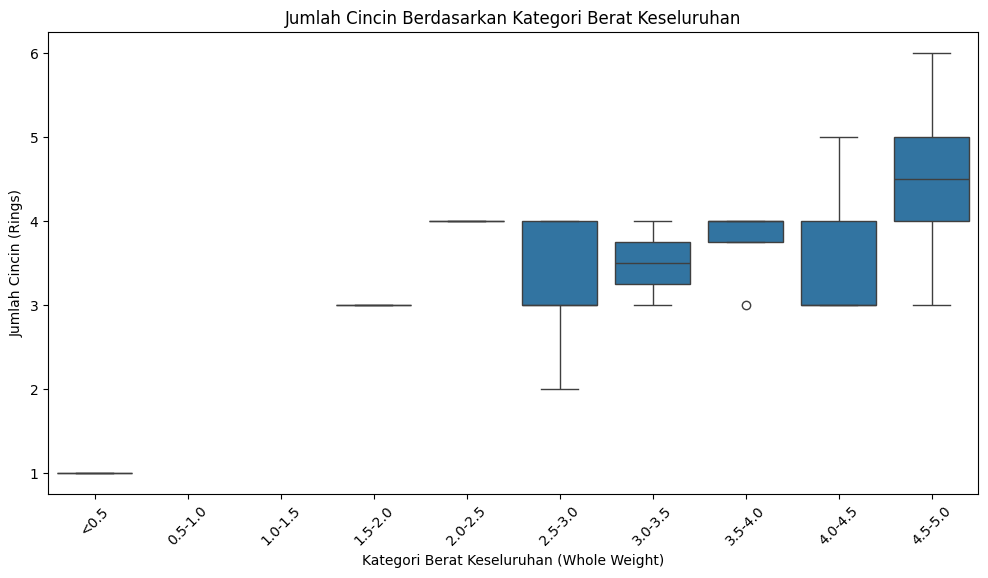

In [18]:
# Membuat kategori berat keseluruhan
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['<0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0']
df['weight_category'] = pd.cut(df['whole-weight'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.boxplot(x='weight_category', y='rings', data=df)
plt.title('Jumlah Cincin Berdasarkan Kategori Berat Keseluruhan')
plt.xlabel('Kategori Berat Keseluruhan (Whole Weight)')
plt.ylabel('Jumlah Cincin (Rings)')
plt.xticks(rotation=45)
plt.show()

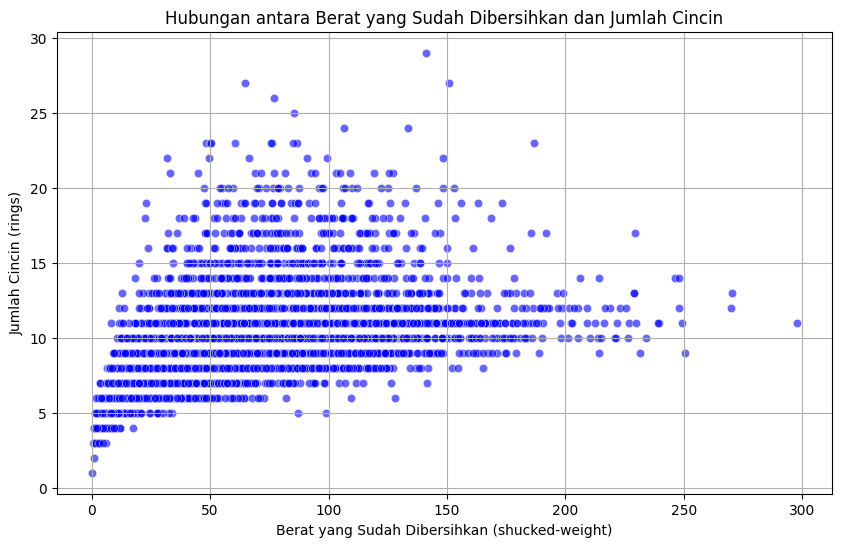

In [19]:
# Visualisasi hubungan antara berat yang sudah dibersihkan dan jumlah cincin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shucked-weight', y='rings', data=df, alpha=0.6, color='blue')
plt.title('Hubungan antara Berat yang Sudah Dibersihkan dan Jumlah Cincin')
plt.xlabel('Berat yang Sudah Dibersihkan (shucked-weight)')
plt.ylabel('Jumlah Cincin (rings)')
plt.grid()
plt.show()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_189296\2629572011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rings', y='whole-weight', data=df, palette='Set2')


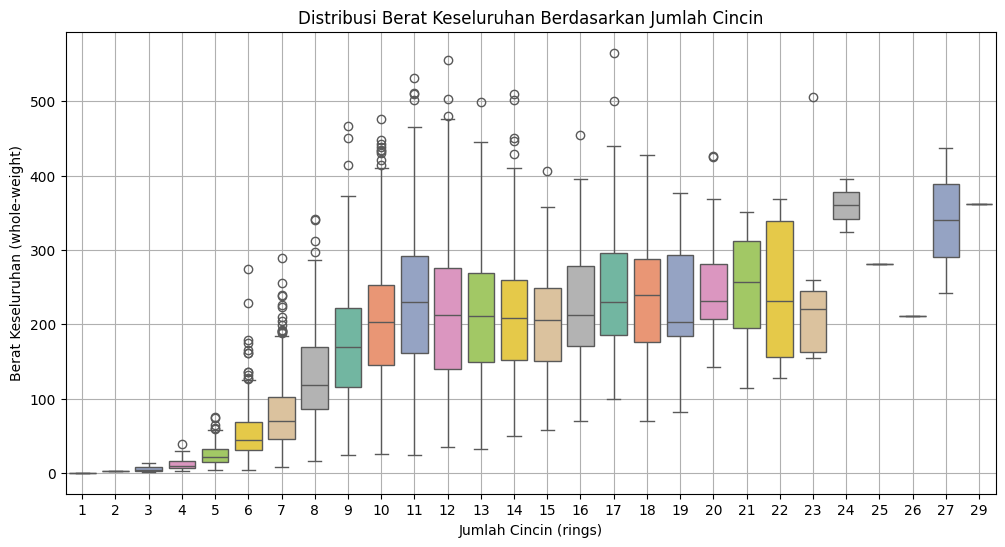

In [20]:
# Visualisasi distribusi berat keseluruhan berdasarkan jumlah cincin
plt.figure(figsize=(12, 6))
sns.boxplot(x='rings', y='whole-weight', data=df, palette='Set2')
plt.title('Distribusi Berat Keseluruhan Berdasarkan Jumlah Cincin')
plt.xlabel('Jumlah Cincin (rings)')
plt.ylabel('Berat Keseluruhan (whole-weight)')
plt.grid()
plt.show()

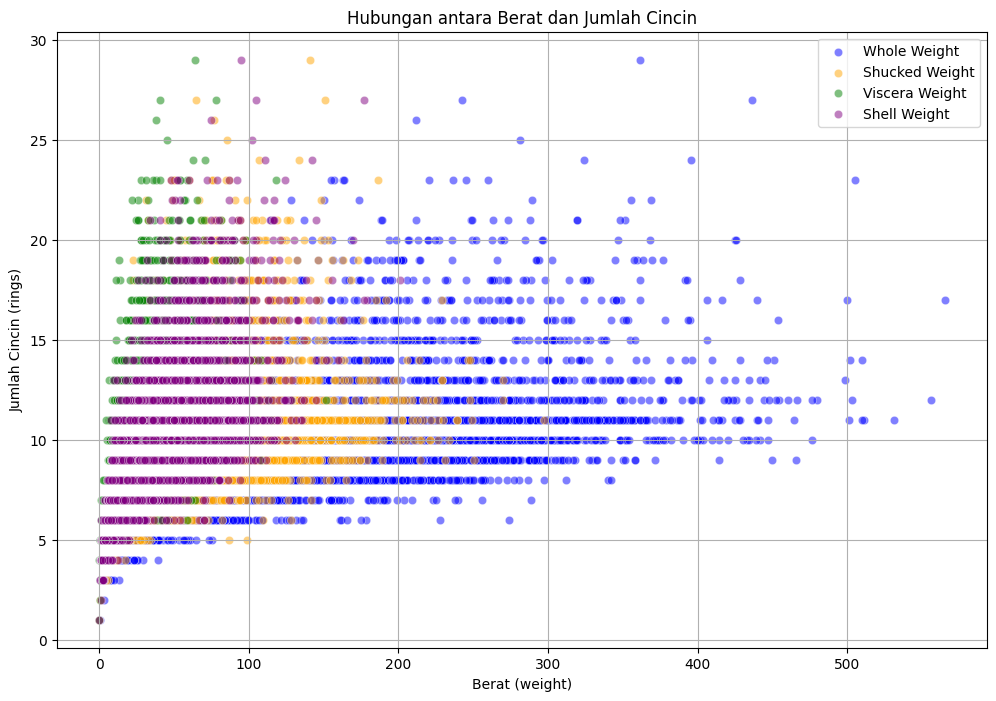

In [21]:
# Visualisasi hubungan antara semua fitur berat dan jumlah cincin
plt.figure(figsize=(12, 8))
sns.scatterplot(x='whole-weight', y='rings', data=df, alpha=0.5, color='blue', label='Whole Weight')
sns.scatterplot(x='shucked-weight', y='rings', data=df, alpha=0.5, color='orange', label='Shucked Weight')
sns.scatterplot(x='viscera-weight', y='rings', data=df, alpha=0.5, color='green', label='Viscera Weight')
sns.scatterplot(x='shell-weight', y='rings', data=df, alpha=0.5, color='purple', label='Shell Weight')
plt.title('Hubungan antara Berat dan Jumlah Cincin')
plt.xlabel('Berat (weight)')
plt.ylabel('Jumlah Cincin (rings)')
plt.legend()
plt.grid()
plt.show()

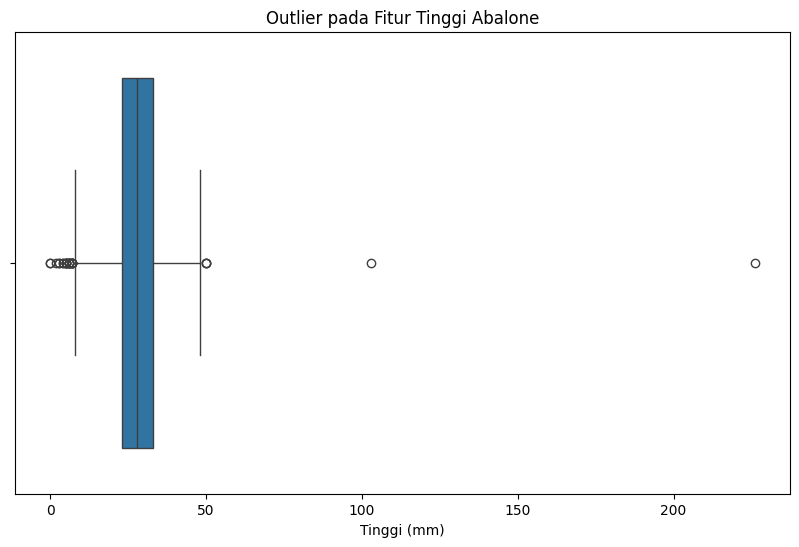

In [22]:
# Memeriksa outlier pada fitur tinggi
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['height'])
plt.title('Outlier pada Fitur Tinggi Abalone')
plt.xlabel('Tinggi (mm)')
plt.show()

PREPROCESSING DATA